# Graphs

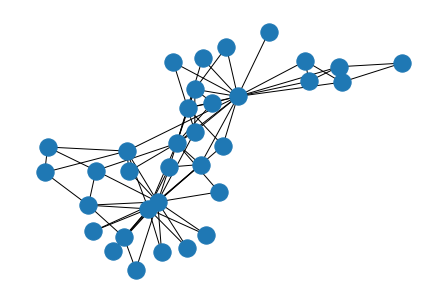

In [1]:
import networkx as nx
G = nx.karate_club_graph()
nx.draw(G)

Convert a graph into a dictionary of graph properties in tensor-format. Class `GraphDict` is supposed to behave like a python dict which has named tensor values.

In [2]:
from kgcnn.data.base import GraphDict
graph_dict = GraphDict()

INFO:kgcnn.graph.adapter:`GraphMethodsAdapter` is deprecated and will be removed in future versions in favor of `GraphPreProcessorBase`. This is done, in order not to pollute `GraphDict`s namespace for increasing number of methods.


In [3]:
graph_dict.from_networkx(G, node_attributes="club")
print(graph_dict["club"])

['Mr. Hi' 'Mr. Hi' 'Mr. Hi' 'Mr. Hi' 'Mr. Hi' 'Mr. Hi' 'Mr. Hi' 'Mr. Hi'
 'Mr. Hi' 'Officer' 'Mr. Hi' 'Mr. Hi' 'Mr. Hi' 'Mr. Hi' 'Officer'
 'Officer' 'Mr. Hi' 'Mr. Hi' 'Officer' 'Mr. Hi' 'Officer' 'Mr. Hi'
 'Officer' 'Officer' 'Officer' 'Officer' 'Officer' 'Officer' 'Officer'
 'Officer' 'Officer' 'Officer' 'Officer' 'Officer']


## Important: 
Functions to manipulate graph tensors are not methods of `GraphDict` anymore as of version >=2.1.1!

Use Preprocessors class for graph dictionaires instead.

In [10]:
from kgcnn.graph.preprocessor import AddEdgeSelfLoops, MakeUndirectedEdges, SortEdgeIndices, NormalizeEdgeWeightsSymmetric

In [11]:
# graph_dict.add_edge_self_loops().make_undirected_edges().sort_edge_indices().normalize_edge_weights_sym()
AddEdgeSelfLoops()(graph_dict)
MakeUndirectedEdges()(graph_dict)
SortEdgeIndices()(graph_dict)
NormalizeEdgeWeightsSymmetric()(graph_dict)

{'node_number': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 'edge_indices': array([[ 0,  0],
        [ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  1],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  2],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  3],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
     

Each Preprocessors takes arguments to specify the name of the tensors to interpret as e.g. indices, attributes etc. that overwrites the default naming such as "edge_indices" and "node_labels". See the documentation of Preprocessors of `GraphPreProcessorBase`.

In [12]:
AddEdgeSelfLoops().get_config()

{'in_place': True,
 'name': 'add_edge_self_loops',
 'edge_indices': 'edge_indices',
 'edge_attributes': '^edge_.*',
 'remove_duplicates': True,
 'sort_indices': True,
 'fill_value': 0}

In [13]:
from kgcnn.graph.preprocessor import SetAngle

In [14]:
SetAngle(range_indices="edge_indices", angle_indices="angle_combinations")(graph_dict)

{'node_number': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 'edge_indices': array([[ 0,  0],
        [ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  1],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  2],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  3],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
     

## Warning!!!

If you change the graph tensors, redefine edges or delete nodes, then dependent tensors such as attributes or angles or index maps are not modified accordingly or updated automatically, since `GraphDict` is nothing but a dictionary of tensor values. 

Functions such as `sort_edge_indices`, however, allow to add a pattern-matching string or a list of names for edge dependent tensors such as e.g. "edge\_attributes" or in general all "\^edge\_.\*" names to sort accordingly. Check the documentation for more details.

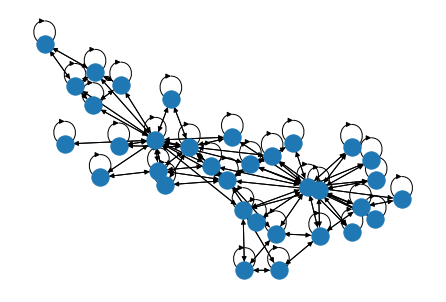

In [15]:
G_modified = graph_dict.to_networkx()
nx.draw(G_modified)